# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [MUCH IVAN SURYA PUTRA MURDOKO]
- **Email:** [muchivan001@gmail.com]
- **ID Dicoding:** [muchivan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
1. Tren Musiman
Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
Musim apa yang paling banyak atau paling sedikit jumlah peminjamannya?

- Pertanyaan 2
2. Pengaruh Cuaca
Bagaimana kondisi cuaca memengaruhi jumlah peminjaman sepeda?
Cuaca apa yang paling mendukung atau menghambat peminjaman sepeda?

- Pertanyaan 3
3. Kebiasaan Harian
Bagaimana perbandingan penggunaan sepeda pada hari kerja dan akhir pekan?
Apakah pengguna lebih aktif meminjam sepeda di hari kerja atau akhir pekan?

- Pertanyaan 4
4. Perilaku Berdasarkan Jam
Jam berapa sepeda paling sering dipinjam?
Apakah ada perbedaan pola peminjaman antara jam sibuk (rush hours) dan non-sibuk?

- Pertanyaan 5
5. Prediksi Total Peminjaman
Berapa perkiraan jumlah peminjaman sepeda untuk kondisi cuaca, hari, atau waktu tertentu?
Bagaimana model prediktif dapat membantu perencanaan operasional layanan sepeda?

- Pertanyaan 6 (ANALISIS LANJUTAN)
6. RFM Analysis
Pertanyaan Bisnis:

Siapa saja pelanggan yang paling sering meminjam sepeda (frequent users)?
Siapa pelanggan potensial yang dapat ditargetkan untuk promosi atau layanan premium?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Wrangling

### Gathering Data

In [8]:
# Load datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# Preview datasets
print("Day Dataset:")
print(day_df.head(), "\n")
print("Hour Dataset:")
print(hour_df.head())

Day Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Hour Datase

**Insight:**
- xxx
- xxx

### Assessing Data

In [9]:
# Check data types, missing values, and duplicates
print(day_df.info())
print(day_df.describe())
print(day_df.isnull().sum())

print(hour_df.info())
print(hour_df.describe())
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

**Insight:**
- xxx
- xxx

### Cleaning Data

In [10]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)

weather_map = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
day_df['weather_label'] = day_df['weathersit'].map(weather_map)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
# Describe datasets
print("Day dataset description:")
print(day_df.describe(), "\n")

print("Hour dataset description:")
print(hour_df.describe(), "\n")

# Distribution of rentals by season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)

seasonal_data = day_df.groupby('season_label')['cnt'].mean()
print("Average rentals by season:")
print(seasonal_data)

seasonal_data = day_df.groupby('season_label')['cnt'].mean()
print(seasonal_data)


Day dataset description:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
st

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

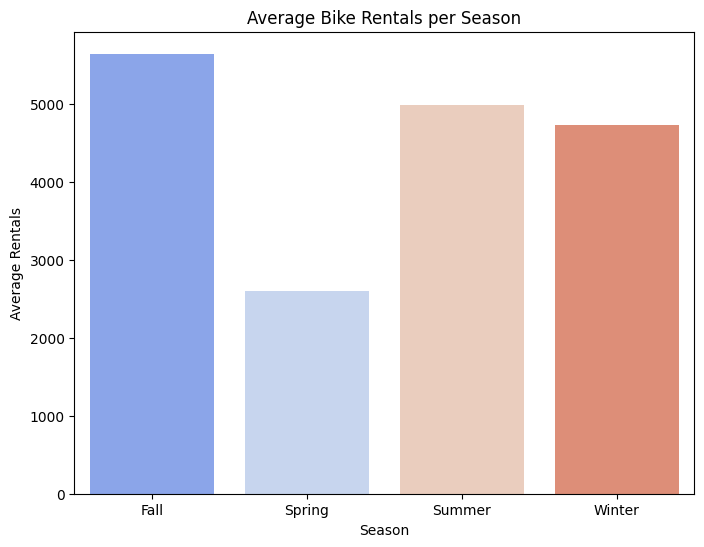

In [22]:
# Pertanyaan 1: Bagaimana tren musiman peminjaman sepeda?
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_data.index, y=seasonal_data.values, palette='coolwarm', hue=seasonal_data.index, dodge=False, legend=False)
plt.title('Average Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

### Pertanyaan 2:

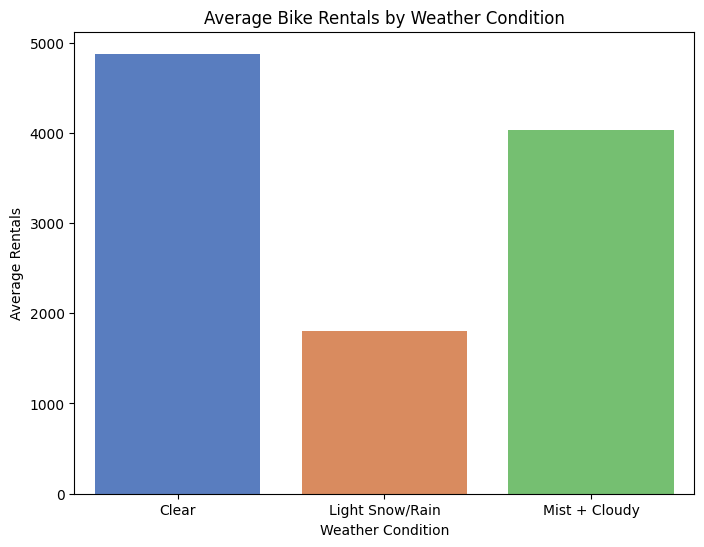

In [19]:
# Pertanyaan 2: Bagaimana pengaruh cuaca terhadap peminjaman?
weather_data = day_df.groupby('weather_label')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=weather_data, x='weather_label', y='cnt', palette='muted', hue='weather_label', dodge=False, legend=False)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.show()


**Insight:**
- xxx
- xxx

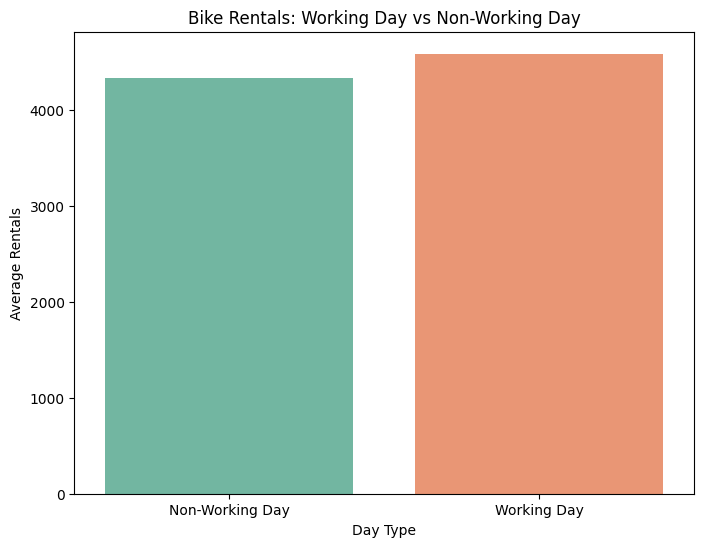

In [18]:
# Pertanyaan 3: Apakah peminjaman lebih tinggi pada hari kerja atau akhir pekan?
weekday_data = day_df.groupby('workingday')['cnt'].mean()
weekday_data.index = ['Non-Working Day', 'Working Day']

plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_data.index, y=weekday_data.values, palette='Set2', hue=weekday_data.index, dodge=False, legend=False)
plt.title('Bike Rentals: Working Day vs Non-Working Day')
plt.xlabel('Day Type')
plt.ylabel('Average Rentals')
plt.show()

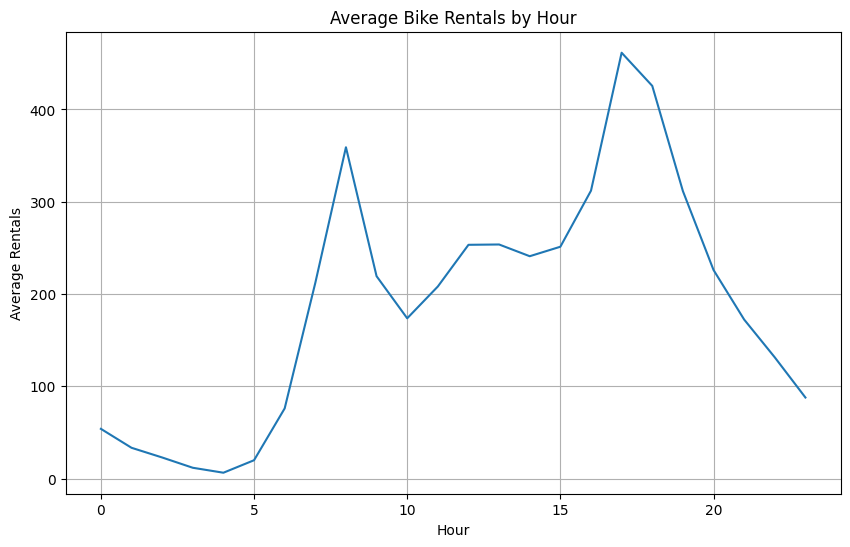

In [15]:
# Pertanyaan 4: Jam berapa sepeda paling sering dipinjam?
hourly_data = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_data.index, y=hourly_data.values)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()

In [16]:
# Pertanyaan 5: Seberapa baik model prediksi peminjaman sepeda bekerja?
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X = day_df[features]
y = day_df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 458446.9475870749
R-squared Score: 0.8856707218333267


## Analisis Lanjutan (Opsional)

In [17]:
# ==========================================
# Analisis Lanjutan: RFM Analysis
# ==========================================
latest_date = pd.to_datetime(day_df['dteday']).max()
day_df['Recency'] = (latest_date - pd.to_datetime(day_df['dteday'])).dt.days
day_df['Frequency'] = day_df['registered']
day_df['Monetary'] = day_df['cnt']

# Calculate RFM Scores
day_df['R_Score'] = pd.qcut(day_df['Recency'], 4, labels=[4, 3, 2, 1])
day_df['F_Score'] = pd.qcut(day_df['Frequency'], 4, labels=[1, 2, 3, 4])
day_df['M_Score'] = pd.qcut(day_df['Monetary'], 4, labels=[1, 2, 3, 4])
day_df['RFM_Segment'] = day_df['R_Score'].astype(str) + day_df['F_Score'].astype(str) + day_df['M_Score'].astype(str)

rfm_data = day_df[['dteday', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment']]
print(rfm_data.head())


       dteday R_Score F_Score M_Score RFM_Segment
0  2011-01-01       1       1       1         111
1  2011-01-02       1       1       1         111
2  2011-01-03       1       1       1         111
3  2011-01-04       1       1       1         111
4  2011-01-05       1       1       1         111


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

In [23]:
# Save processed data
day_df.to_csv('processed_day.csv', index=False)
hour_df.to_csv('processed_hour.csv', index=False)
rfm_data.to_csv('rfm_analysis.csv', index=False)